In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import pickle as pkl
import os
from sklearn.metrics import roc_curve, auc, precision_recall_curve, f1_score

from matplotlib import rcParams
rcParams['font.family'] = 'Arial'

import sys
sys.path.append('/fs/home/liuzhaoyang/project/cci_evaluation/scripts/')
import extract_tool_results
import extract_tool_results_direction

In [3]:
from importlib import reload
reload(extract_tool_results)
reload(extract_tool_results_direction)

<module 'extract_tool_results_direction' from '/fs/home/liuzhaoyang/project/cci_evaluation/scripts/extract_tool_results_direction.py'>

In [4]:
tool_name_trans_dic = {
    'cc':'CellChat',
    'cpdb':'CellPhoneDB',
    'italk':'iTALK',
    'scr':'SingleCellSignalR',
    'natmi':'NATMI',
    'icellnet':'ICELLNET',
    'nichenet':'NicheNet',
    'scmlnet':'scMLnet',
    'connectome':'Connectome',
    'cytotalk':'CytoTalk',
    'cellcall':'CellCall',
    'domino':'Domino',
    'stlearn':'stLearn',
    'cpdb_v3':'CellPhoneDB_v3',
    'giotto':'Giotto',
    'base_line':'LR product'
        }

def trans_ip_symbol(ip):
    ip = ip.split('_')
    if len(ip) > 2:
        part_b = '({})'.format('+'.join(ip[1:]))
    else:
        part_b = ip[1]
    return '{} - {}'.format(ip[0],part_b)


# ST celltype

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


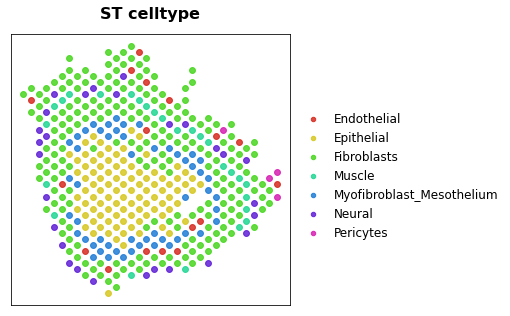

In [3]:
data_base_dir = '/fs/home/liuzhaoyang/project/cci_evaluation/human_intestinal/ST_A3_GSM4797918/data'
dev_path = '{}/STRIDE/STRIDE_spot_celltype_frac.txt'.format(data_base_dir)
coord_path = '{}/processed/st_coord.tsv'.format(data_base_dir)

st_pos_df = pd.read_csv(coord_path, sep='\t', index_col=0)
dev_df = pd.read_csv(dev_path, sep='\t', index_col = 0)

max_frac_cts = dev_df.idxmax(axis=1)

st_meta_df = pd.DataFrame(max_frac_cts, index = list(dev_df.index),
                         columns=['celltype'])

extract_tool_results.plot_st_celltype(st_pos_df, st_meta_df, s=35)

In [9]:
st_meta_df.to_csv('{}/processed/st_meta_no_filtering.tsv'.format(data_base_dir),
                 sep='\t', header=None)

# compute cell type distance type

- define near/far cell-type pair

In [4]:
project_base_dir = '/fs/home/liuzhaoyang/project/cci_evaluation/human_intestinal/ST_A3_GSM4797918/'


meta_path = '{}/data/processed/st_meta.tsv'.format(project_base_dir)
coord_path = '{}/data/processed/st_coord.tsv'.format(project_base_dir)
pkl_save_dir = '{}/data/pkl'.format(project_base_dir)

meta_df = pd.read_csv(meta_path, sep = '\t', header = None, index_col = 0)
meta_df.columns = ['celltype']

pos_df = pd.read_csv(coord_path, sep='\t', index_col=0)


##################
# cal ct distype #
##################

avg_dis_sr = extract_tool_results.cal_ct_avg_dis(meta_df, pos_df,nspot_cutoff=0)

ct_distype_sr = extract_tool_results.generate_ct_distype(avg_dis_sr)

if not os.path.exists(pkl_save_dir):
    os.makedirs(pkl_save_dir)

with open('{}/ct_avg_dis_sr.pkl'.format(pkl_save_dir),'wb') as f:
    pkl.dump(avg_dis_sr, f)
with open('{}/ct_distype_sr.pkl'.format(pkl_save_dir),'wb') as f:
    pkl.dump(ct_distype_sr, f)

near(0): 12; far(1): 3; mid(2): 6


In [5]:
ct_distype_sr

Muscle|Neural                            0
Muscle|Fibroblasts                       0
Muscle|Epithelial                        2
Muscle|Endothelial                       0
Muscle|Pericytes                         2
Muscle|Myofibroblast_Mesothelium         0
Neural|Fibroblasts                       0
Neural|Epithelial                        2
Neural|Endothelial                       0
Neural|Pericytes                         1
Neural|Myofibroblast_Mesothelium         0
Fibroblasts|Epithelial                   0
Fibroblasts|Endothelial                  0
Fibroblasts|Pericytes                    2
Fibroblasts|Myofibroblast_Mesothelium    0
Epithelial|Endothelial                   2
Epithelial|Pericytes                     1
Epithelial|Myofibroblast_Mesothelium     0
Endothelial|Pericytes                    2
Endothelial|Myofibroblast_Mesothelium    0
Pericytes|Myofibroblast_Mesothelium      1
dtype: int64

## compute & plot DES

cc
cpdb
scr
natmi
icellnet
italk
nichenet
scmlnet
connectome
cytotalk
cellcall
domino
stlearn
cpdb_v3
giotto
base_line


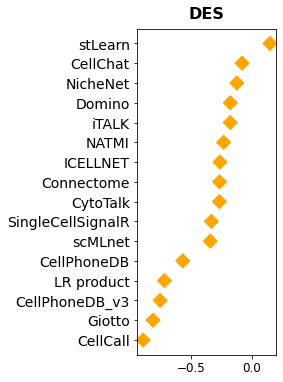

In [21]:
project_base_dirs = [
    '/fs/home/liuzhaoyang/project/cci_evaluation/human_intestinal/ST_A3_GSM4797918/'
]

tool_list = [
    'cc', 'cpdb', 'scr', 'natmi', 'icellnet', 'italk',
    'nichenet', 'scmlnet', 'connectome', 'cytotalk', 'cellcall',
    'domino', 'stlearn', 'cpdb_v3', 'giotto', 'base_line'
]

for project_base_dir in project_base_dirs:
    
    tool_res_dic = extract_tool_results.extract_tool_res_dic(
        project_base_dir, tool_list,
        verbose=False
    )
    
    d_rat_df = pd.read_csv('{}/data/ip_dis_sinkhorn2/ip_distance_all.tsv'.format(project_base_dir),
                          sep='\t', index_col = 0)

    with open('{}/evaluation_result/pkl/tool_res_dic.pkl'.format(project_base_dir), 'rb') as f:
        tool_res_dic = pkl.load(f)
    with open('{}/data/pkl/ct_distype_sr.pkl'.format(project_base_dir), 'rb') as f:
        ct_distype_sr = pkl.load(f)
    
    extract_tool_results.plot_es_workflow(
        d_rat_df,
        tool_res_dic,
        ct_distype_sr,
        tool_name_trans_dic,
        '{}/evaluation_result/figure'.format(project_base_dir),
        '{}/evaluation_result/pkl'.format(project_base_dir), 
        fig_save_flag=True, pkl_save_flag=True, save_tail_name='',
        verbose=False,
        color_diff=True,
    )    


In [22]:
with open('{}/evaluation_result/pkl/tool_res_dic.pkl'.format(project_base_dirs[0]), 'rb') as f:
    tool_res_dic = pkl.load(f)

tool_n_list = []
for tool in tool_res_dic:
#     if tool == 'base_line':
#         continue
    n_list = []
    for ctp in tool_res_dic[tool]:
        n_list.append(len(tool_res_dic[tool][ctp]))
    tool_n_list.append(np.mean(n_list))
    print(tool, np.mean(n_list))


cc 132.57142857142858
cpdb 19.238095238095237
scr 449.76190476190476
natmi 11.857142857142858
icellnet 125.85714285714286
italk 50.285714285714285
nichenet 54.23809523809524
scmlnet 39.714285714285715
connectome 22.714285714285715
cytotalk 9.857142857142858
cellcall 7.0476190476190474
domino 20.19047619047619
stlearn 11.476190476190476
cpdb_v3 11.523809523809524
giotto 12.19047619047619
base_line 19.0


In [6]:
np.median(tool_n_list)

20.19047619047619

In [5]:
project_base_dirs = [
    '/fs/home/liuzhaoyang/project/cci_evaluation/human_intestinal/ST_A3_GSM4797918/'
]

tool_list = [
    'cc', 'cpdb', 'scr', 'natmi', 'icellnet', 'italk',
    'nichenet', 'scmlnet', 'connectome', 'cytotalk', 'cellcall',
    'domino', 'stlearn', 'cpdb_v3', 'giotto', 'base_line'
]

for project_base_dir in project_base_dirs:
    
    tool_res_dic = extract_tool_results_direction.extract_tool_res_dic_direct(
        project_base_dir, tool_list,
        verbose=False
    )
